<center>
<div class="alert alert-block alert-info">
    <h1> </h1>
    <h1><font size="+3"> <b> Math340 HW4 </b> </font></h1>
    <h1><font size="+3"> <b> Programming in Mathematics </b> </font></h1>
    <h1><font size="+3"> <b> Due October 4, 2024 </b> </font></h1>
    
</div>
</center>

<br>

<center>
<font size="+2">
Department of Mathematics and Statistics <br> <br>
San Diego State University <br> <br>
Fall 2024
</font>
</center>

## Your Name: Vince Verdugo

## Your ID: 826107601

## 1. Summary

Question 1: I created a list to represent all the RGB codes. I then imported the magnitude function we defined in lab. Initialized three more lists, one to store the values of the cosine similarities for each color, one to during for loops to acccess previous list, and one last one to define the 7x7 matrix. I then iterated through using two for loops and calculated the cosine similarities for each color. I then plotted the matrix.

Question 2: I discussed the ideas of rounding and truncation and how it related to the computation of the cosine similarities in question (1b).

Question 3: I modified and expanded the given code to find the frequency of the term "butterfly effect" within the Wikipedia article. I modified the for loop and used two new functions to compare the strings to find the term "butterfly effect"

## 2. Methodology

For question 1, I used different sized lists that ultimately represented matrices. I used the built in <code>round</code> function and numpy functions such as <code>np.sqrt</code>, <code>np.dot</code> as well as a function <code>mag</code> that we defined in lab. I also used two for loops to compute and store my cosine similarity values. For plotting I used matplotlib.pyplot functions like <code>plt.imshow</code>, <code>plt.show</code>, <code>plt.colorbar</code>, <code>plt.xticks</code>, and <code>plt.yticks</code>,

For question 2, I used print statements to compare two values when rounded to three decimal places and unrounded. The rest of my code I typed in markdown. 

For question 3, because some of the strings that contained 'butterfly' and 'effect' contained extra characters like '"', ')', '.[__]' or ended with an 's', I used <code>endswith()</code>, <code>startswith()</code>, and <code>lower()</code> functions when evaluating the if statments to ignore those extra characters. 

## 3. Code and Results (e.g., Tables, Figures, Outputs)

### Results for Question 1 (within a Markdown cell)

#### 1a

In [1]:
#Create list of RGB codes for ROYGBIV colors
#RGB codes are lists
RGB = [[255,0,0],[255,165,0], [255,255,0],[0,128,0],
      [0,0,255],[75,0,130],[128,0,128]]

#### 1b, 1c

In [2]:
#Import magnitude function we used defined in lab
import numpy as np
def mag(A):
    sum = 0
    for i in range(len(A)):
        sum += (A[i])**2
    return np.sqrt(sum)

In [3]:
#Initialize 7 arrays for each color that will act as rows in 7x7 matrix
Rcs, Ocs, Ycs, Gcs, Bcs, Ics, Vcs = [],[],[],[],[],[],[]
#Create list containing previous lists to use in loop
csList = [Rcs,Ocs,Ycs,Gcs,Bcs,Ics,Vcs]
#Matrix to store all cosine similarity lists, will become 7x7
csMatrix = []

#Two for loops
for i in range(0,7):
    for j in range(0,7):
        #Compute cs value for each color pair
        val = round(np.dot(RGB[i],RGB[j])/(mag(RGB[i])*mag(RGB[j])), 3)
        #Append to base color
        csList[i].append(val)
    #Append to matrix
    csMatrix.append(csList[i])

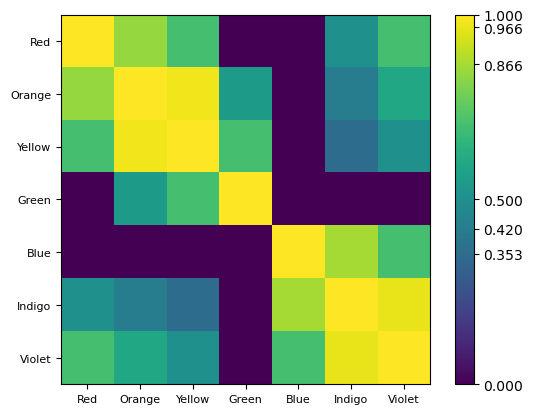

In [4]:
import matplotlib.pyplot as plt
#Create list of color names for tick labels
labels = ['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Indigo', 'Violet']

#Plot csMatrix
plt.imshow(csMatrix)
plt.colorbar(ticks=Ics) #All 7 distinct values can be seen on bar
plt.xticks(ticks=range(len(labels)), labels=labels, size=8)
plt.yticks(ticks=range(len(labels)), labels=labels, size=8)
plt.show()

### Results for Question 2 (within a Markdown cell)

One thing I noticed that was very important to question 1, was rounding our cosine similarity values to 3 decimal places. When I was doing intial tests to make sure my code was properly executing, I saw that when computing the cosine similarity, there were floating point values that were inaccurate to each other at 16 decimal places

For example:

In [5]:
val1 = round(np.dot(RGB[0],RGB[5])/(mag(RGB[0])*mag(RGB[5])), 3)
val2 = round(np.dot(RGB[2],RGB[6])/(mag(RGB[2])*mag(RGB[6])), 3)

print(val1,val2)

0.5 0.5


In [6]:
val1 = np.dot(RGB[0],RGB[5])/(mag(RGB[0])*mag(RGB[5]))
val2 = np.dot(RGB[2],RGB[6])/(mag(RGB[2])*mag(RGB[6]))

print(val1,val2)

0.4997224534895772 0.49999999999999994


We can see that when rounding <code>val1</code> and <code>val2</code> to 3 decimal places, we get the same value of 0.5. However, without rounding, we see that we have a difference of 0.0002775465104227215, and a relative error of 0.0005550930208454431

Additionally, if we were to have truncated <code>val1</code> and <code>val2</code> at 4 decimal places, we would have 0.4997 and 0.4999 which are clearly not the same. 

### Results for Question 3 (within a Markdown cell)

In [7]:
import requests
from bs4 import BeautifulSoup
import re

# Wikipedia URL for the "Chaos Theory" page
url = "https://en.wikipedia.org/wiki/Chaos_theory"

# Send a GET request to fetch the content of the page
response = requests.get(url)

if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the main content of the page
    content = soup.find(id='mw-content-text')

    # Extract text from the content
    text = content.get_text()

    # Split text into words
    words = text.split()

    # Output each word with a blank separator
    #print("\nWords with blank separator:")
    freq=0
    flag=0
    #Change syntax of loop so that I can access index of list words
    for i in range(len(words)-1):
        #Check if current word is butterfly, if so check if next word is effect
        #Use endswith() function because some instances of butterfly start with '"'
        if (words[i].lower().endswith('butterfly')):
            #Use startswith() function because some instances of effect end with '"', ')', ".[__]", etc.
            if(words[i+1].lower().startswith('effect')):
                freq += 1

        #print(words[i], end=" ")
        # after printing word, the print() function won't automatically end with a newline character ("\n").
        # Instead, it will end with a space (" ")
else:
    print("Failed to fetch the Wikipedia page.")
    
print('Frequency of the term "butterfly effect":', freq)

Frequency of the term "butterfly effect": 26
